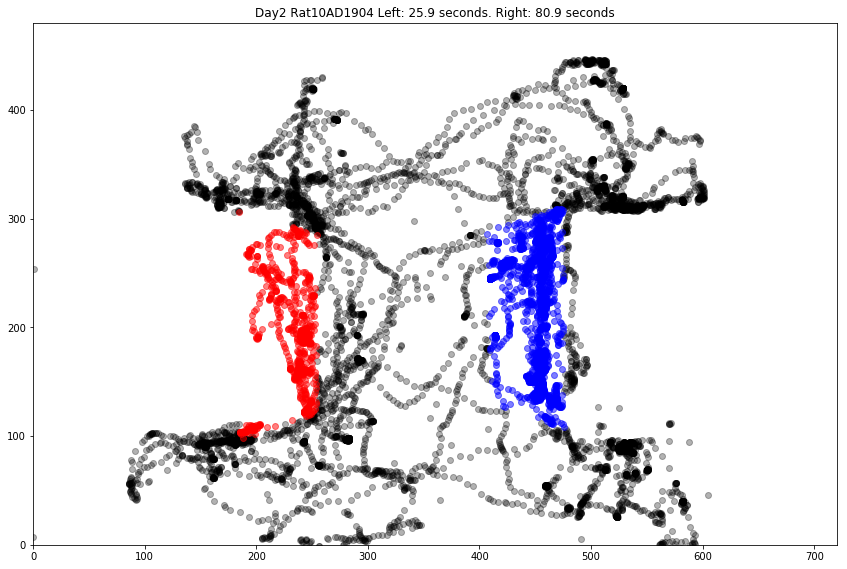

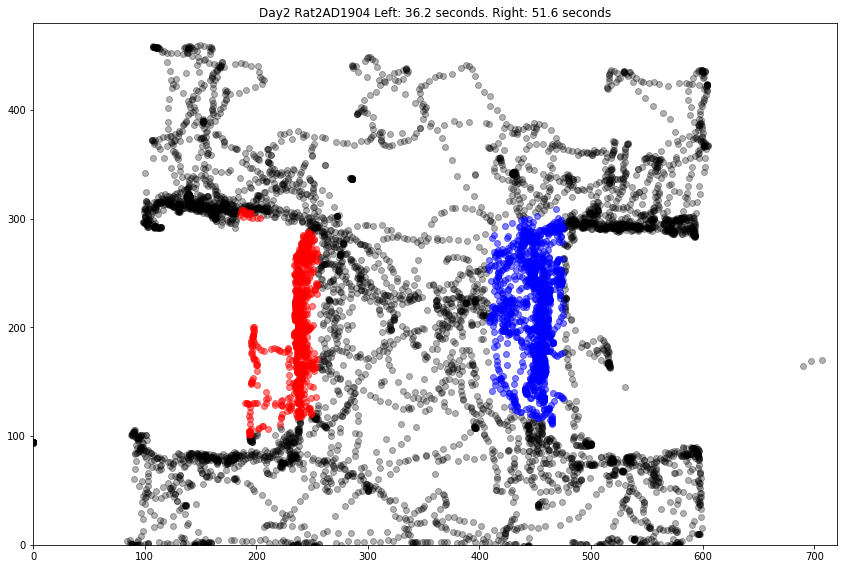

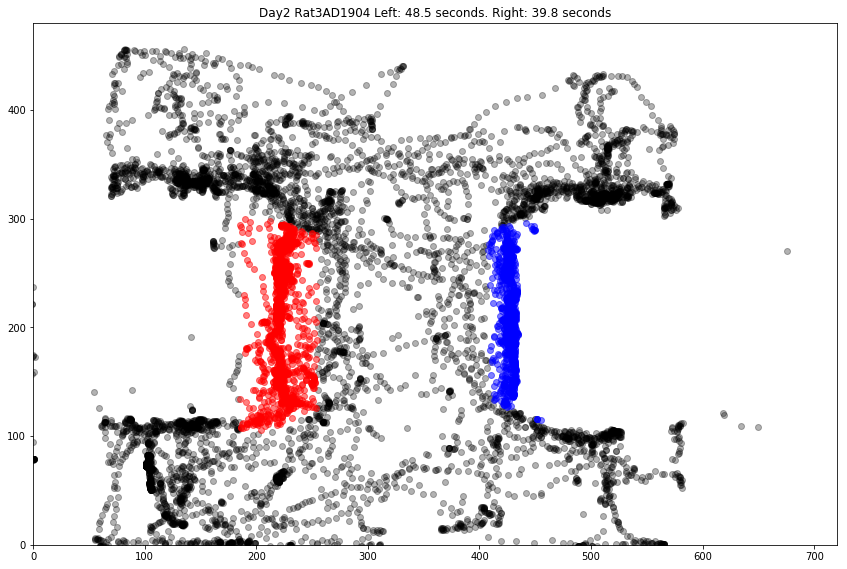

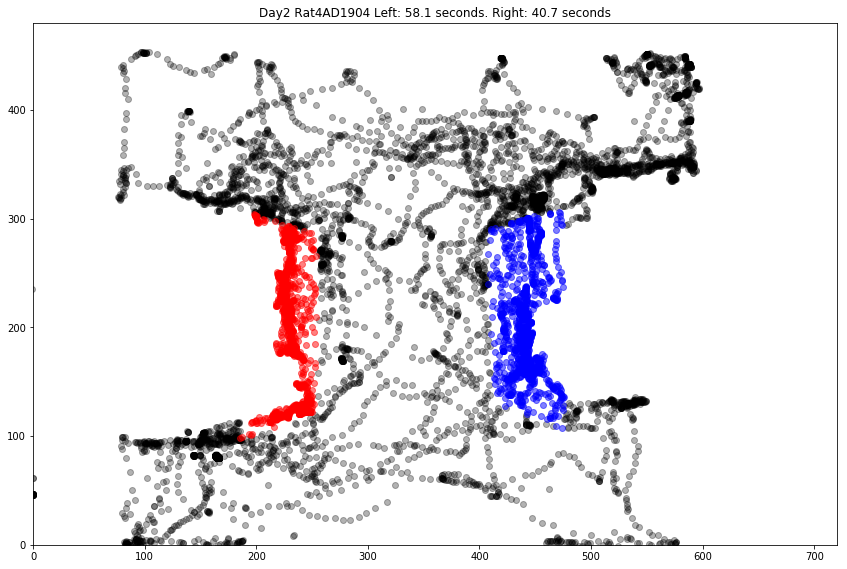

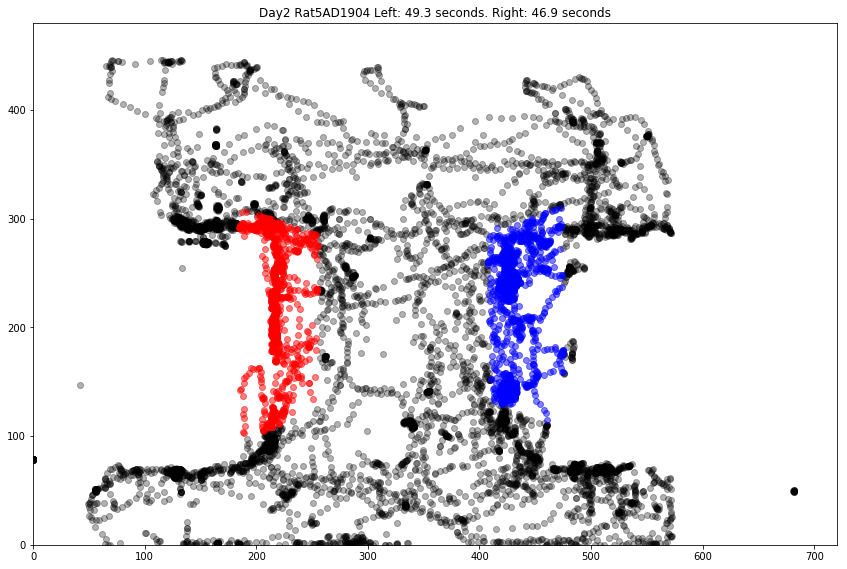

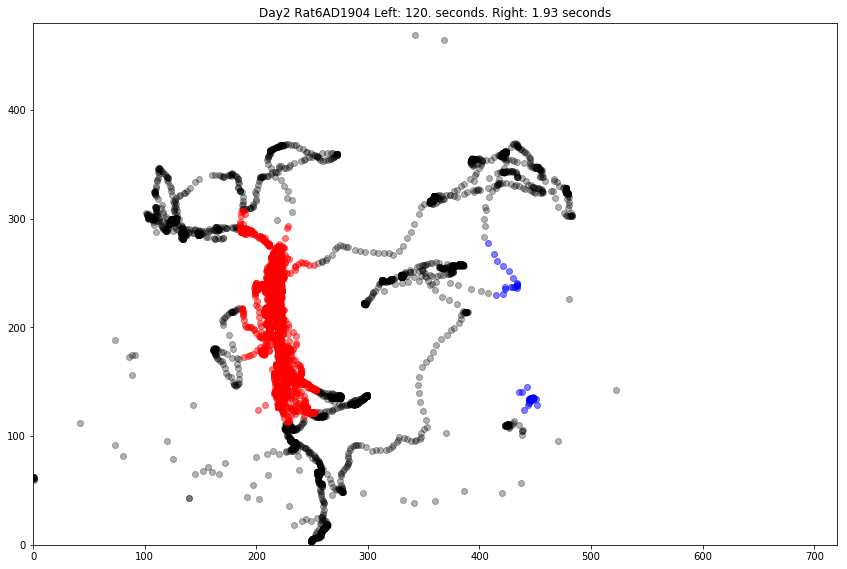

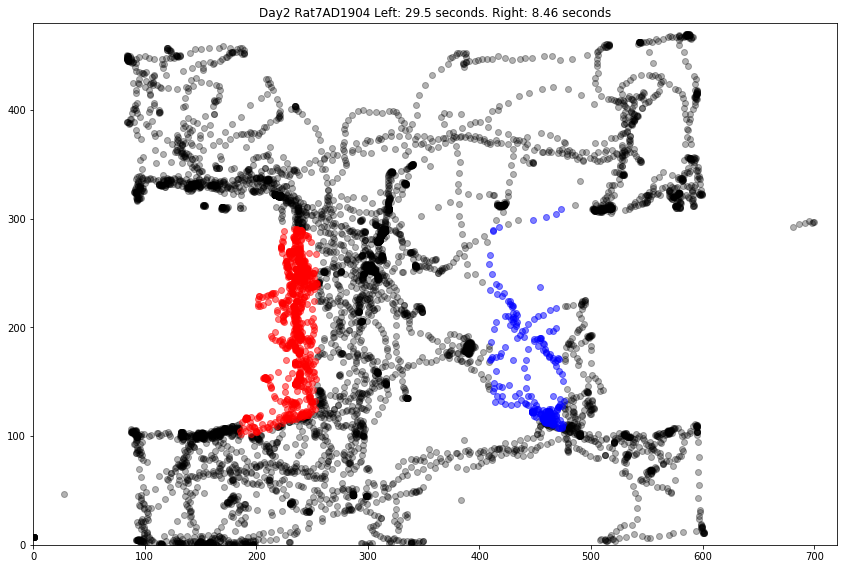

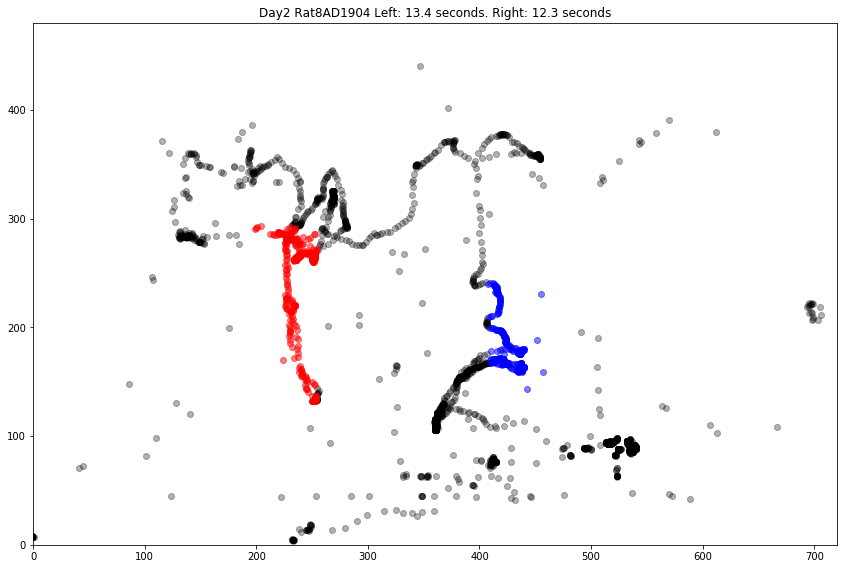

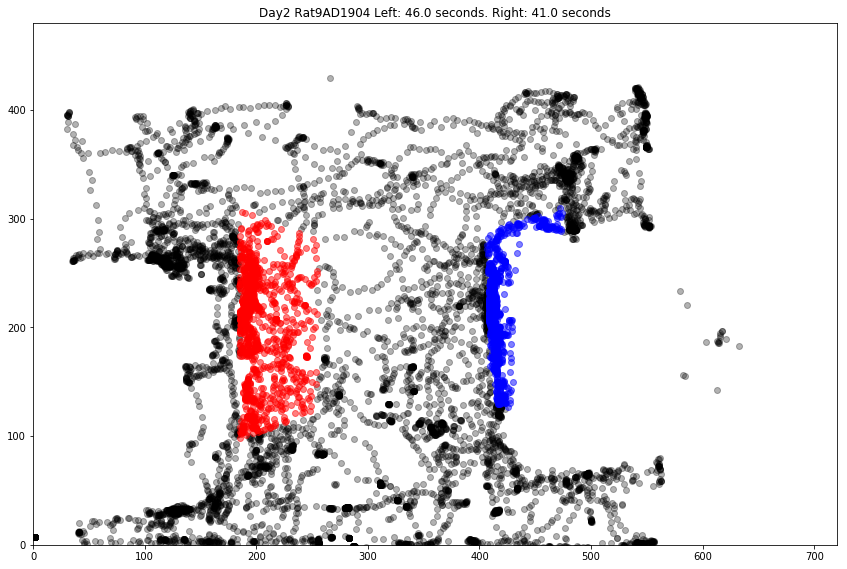

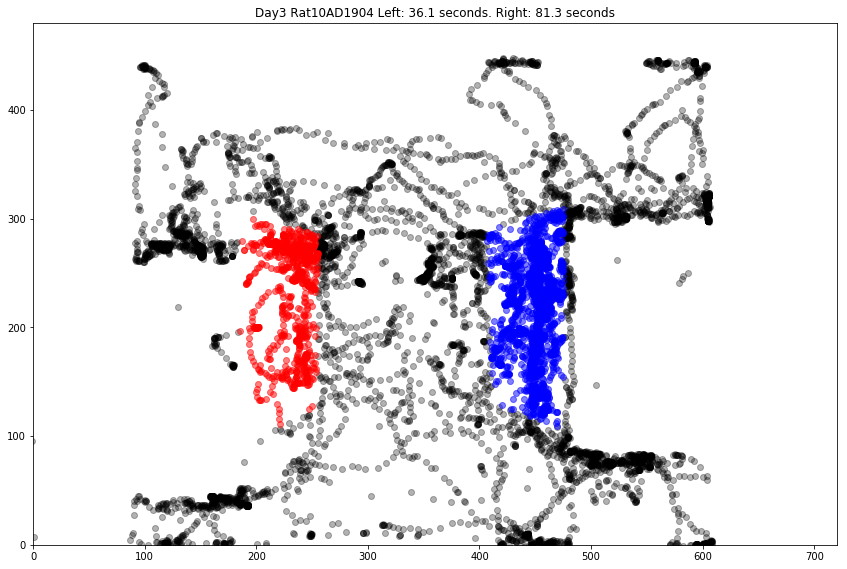

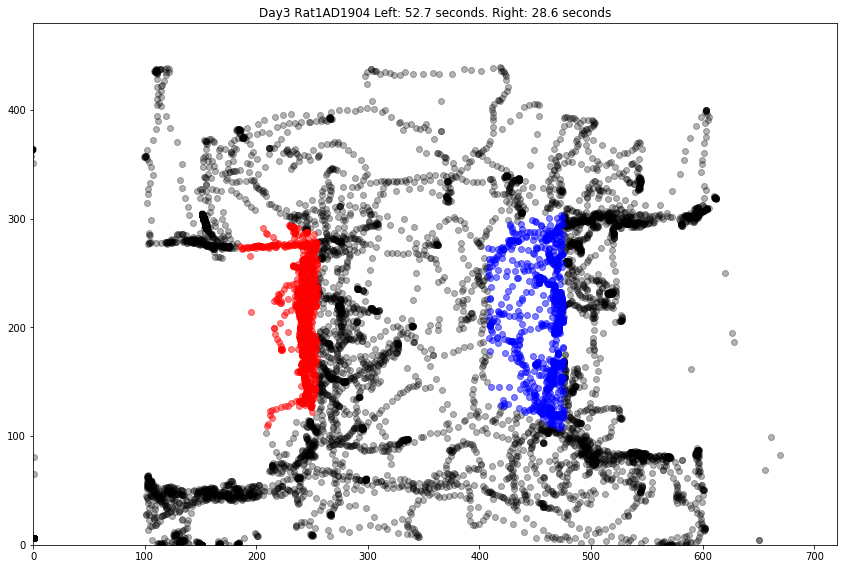

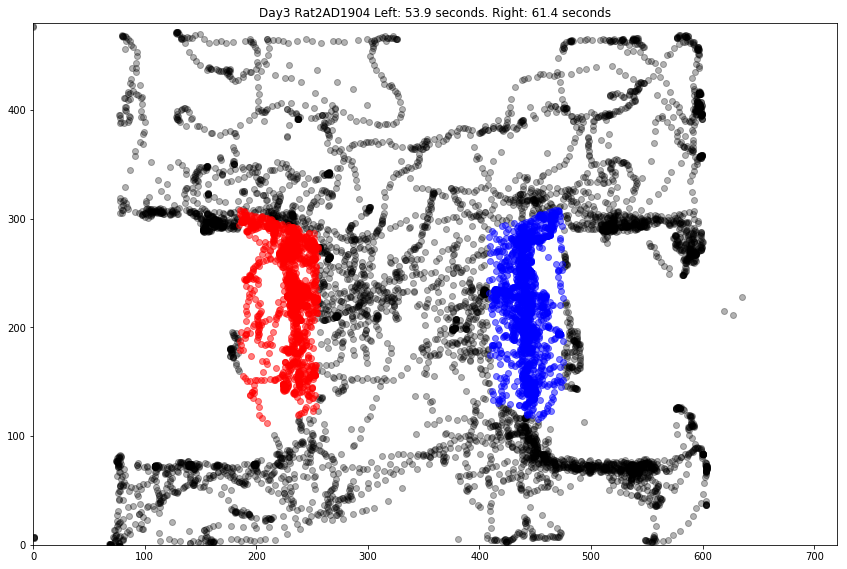

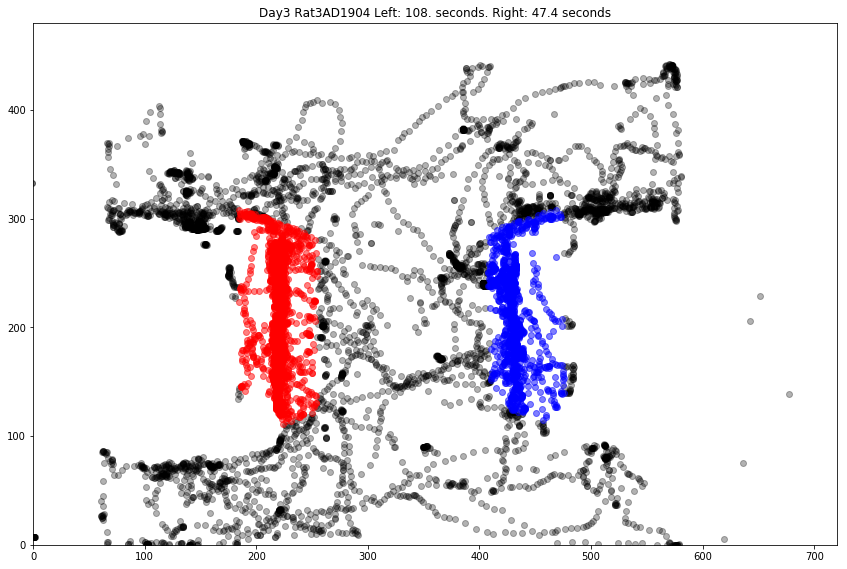

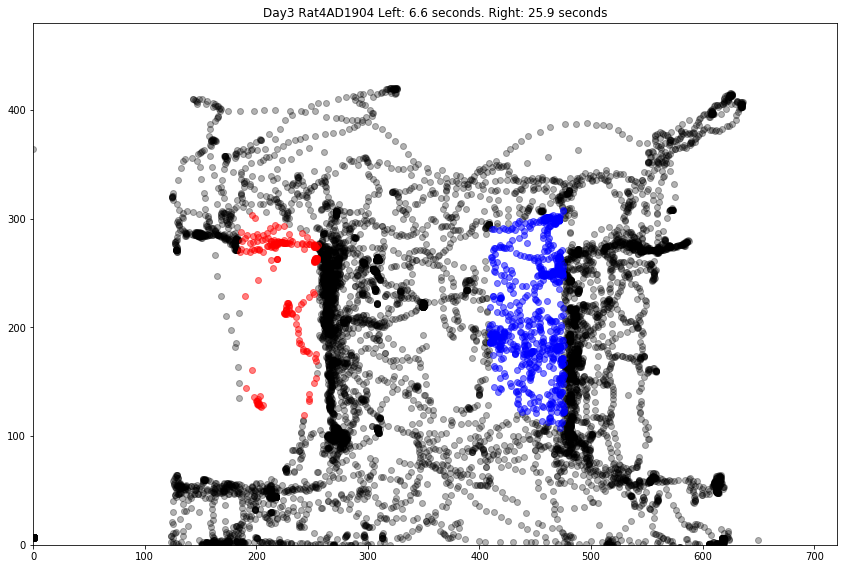

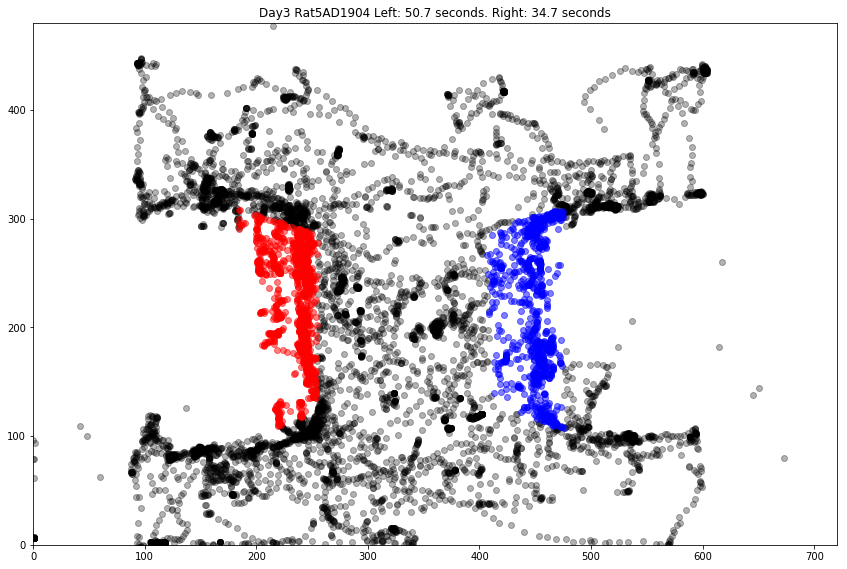

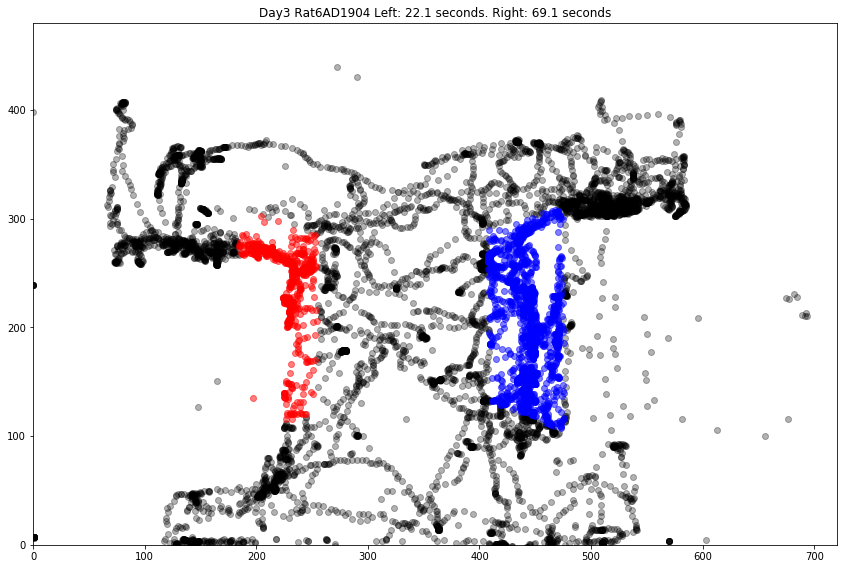

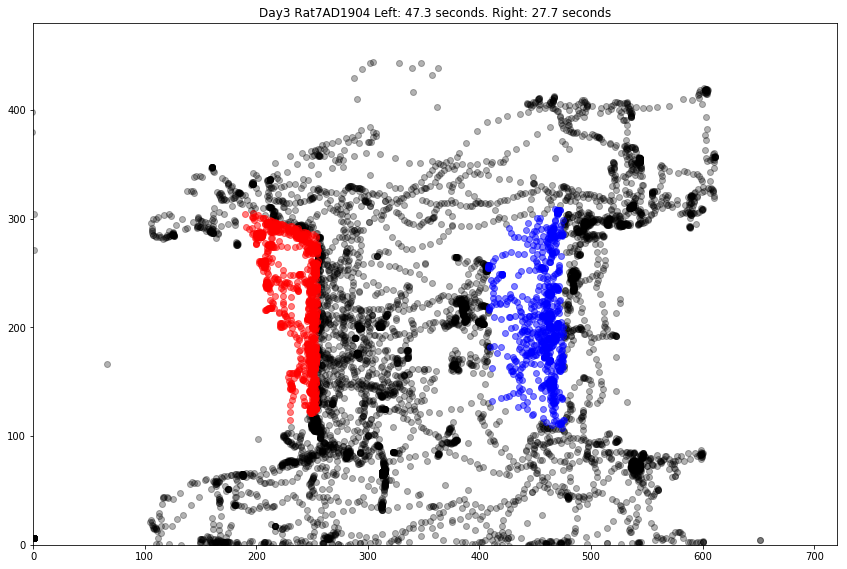

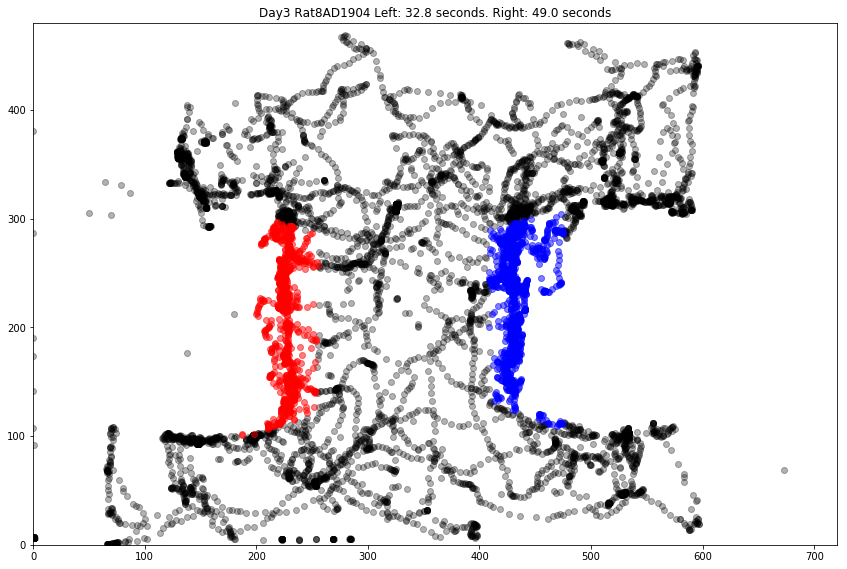

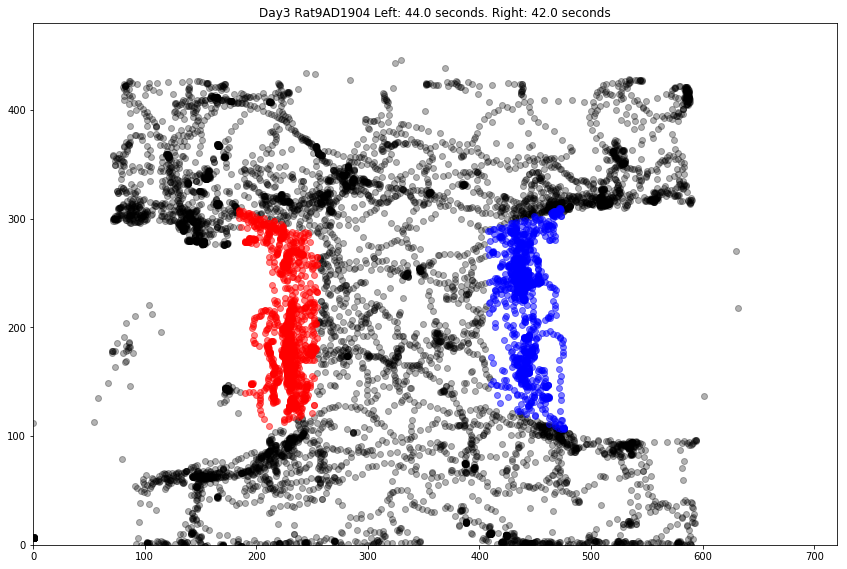

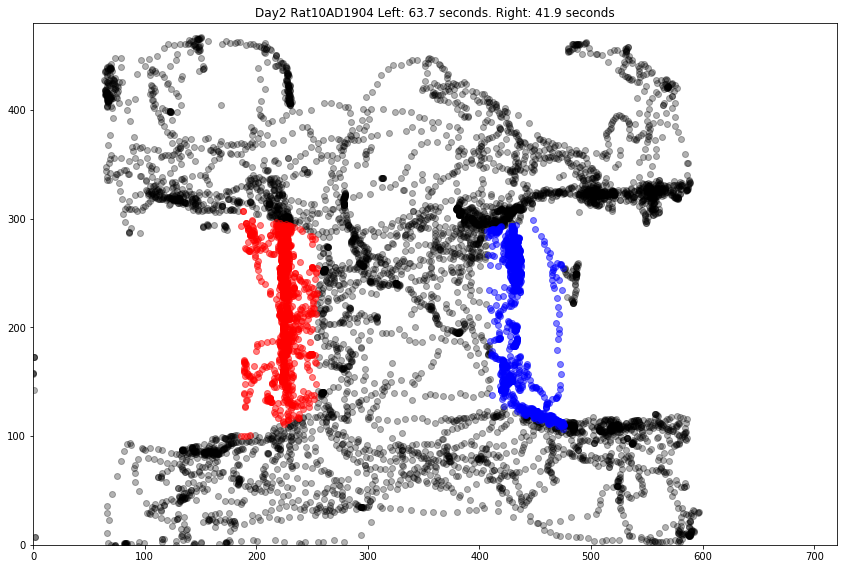

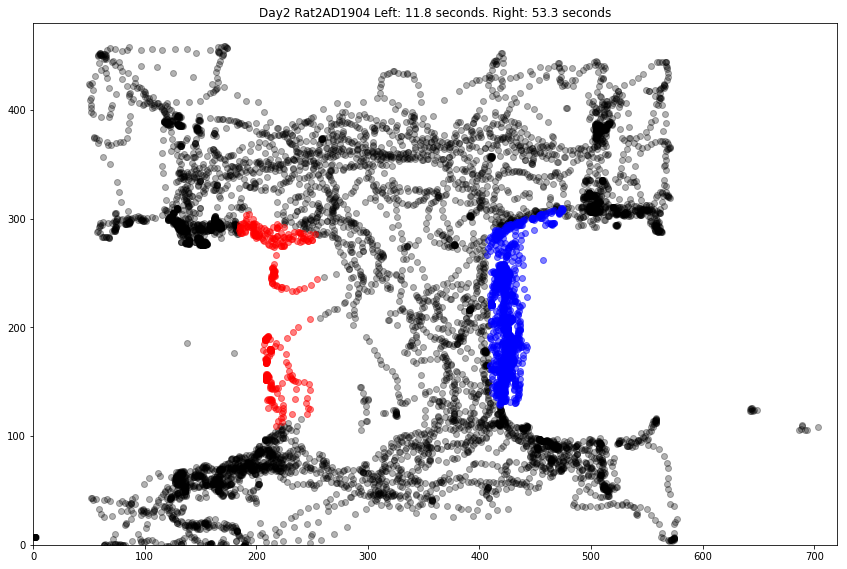

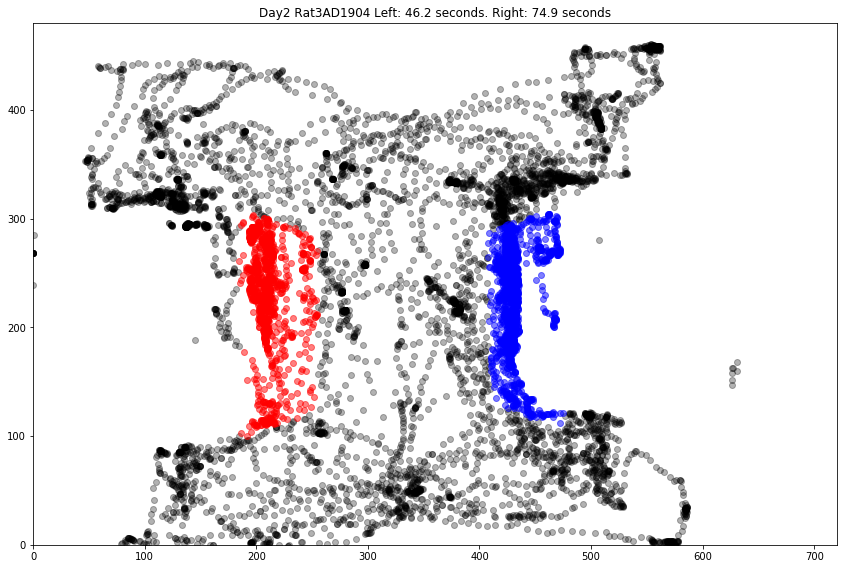

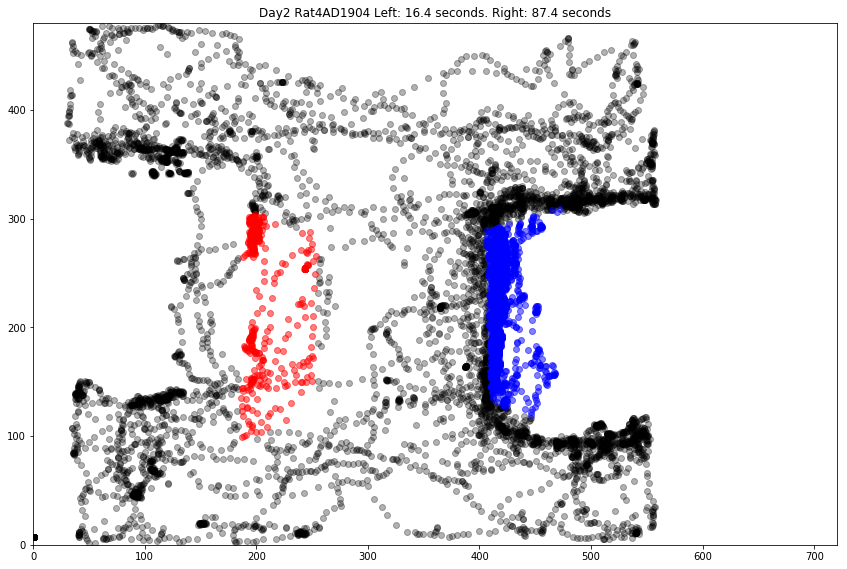

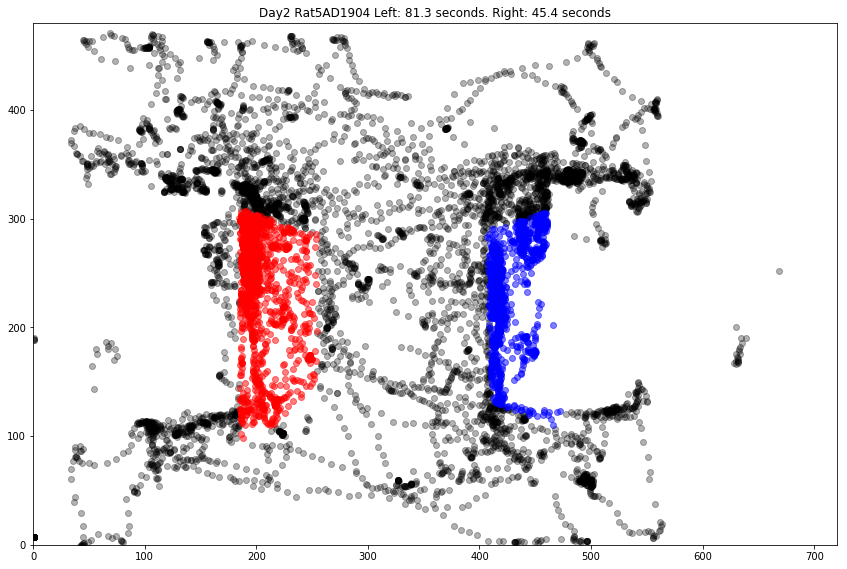

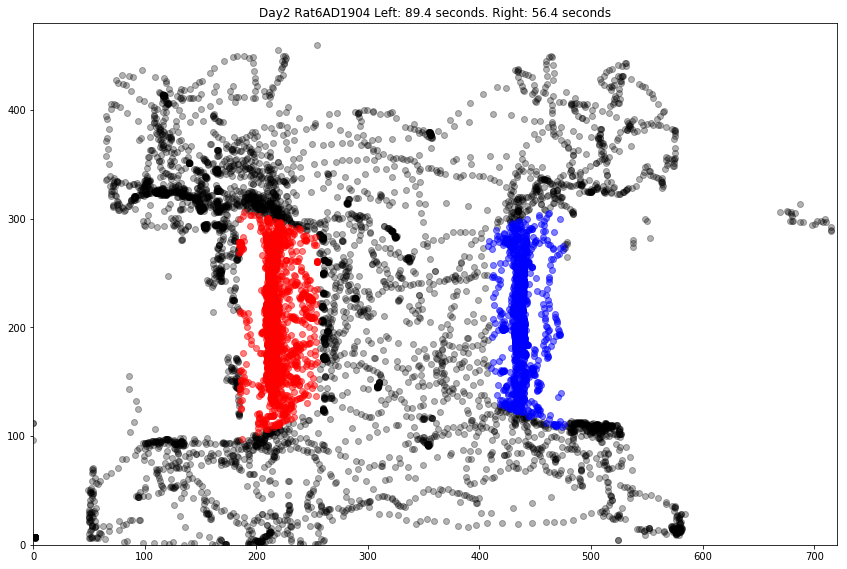

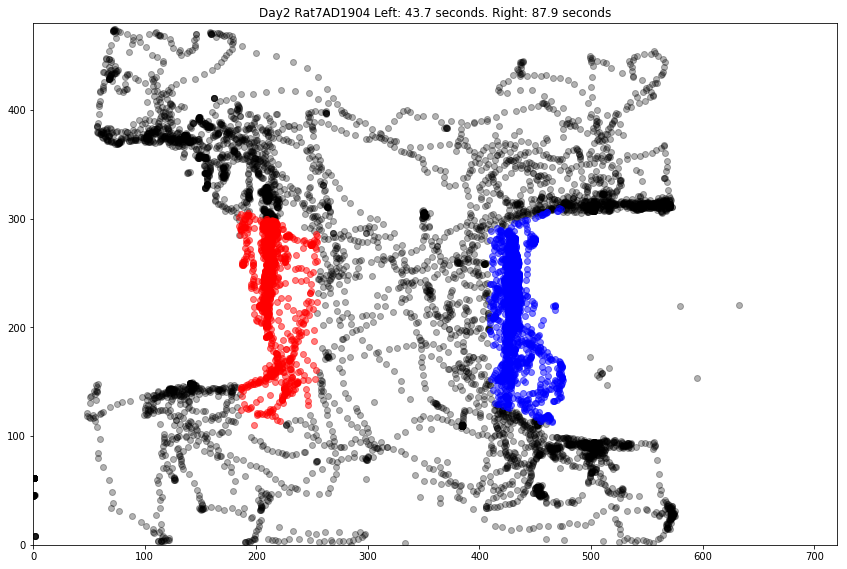

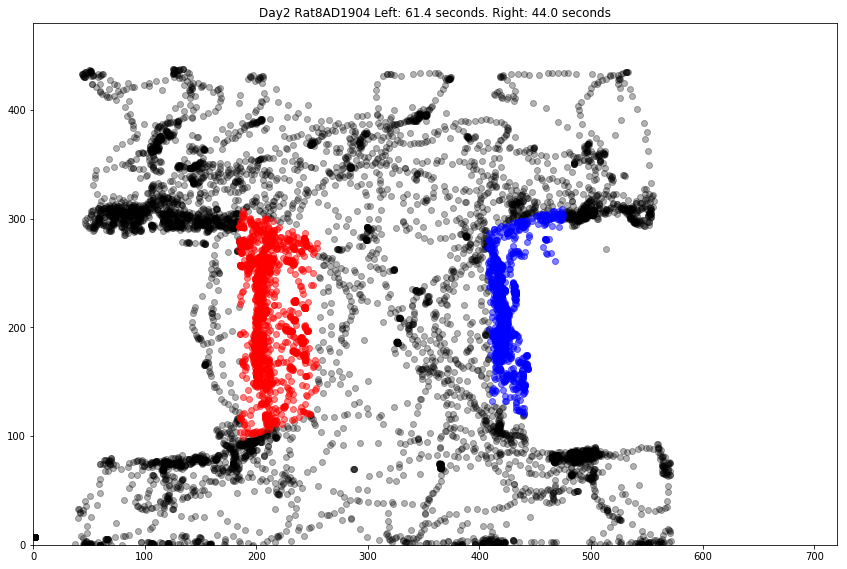

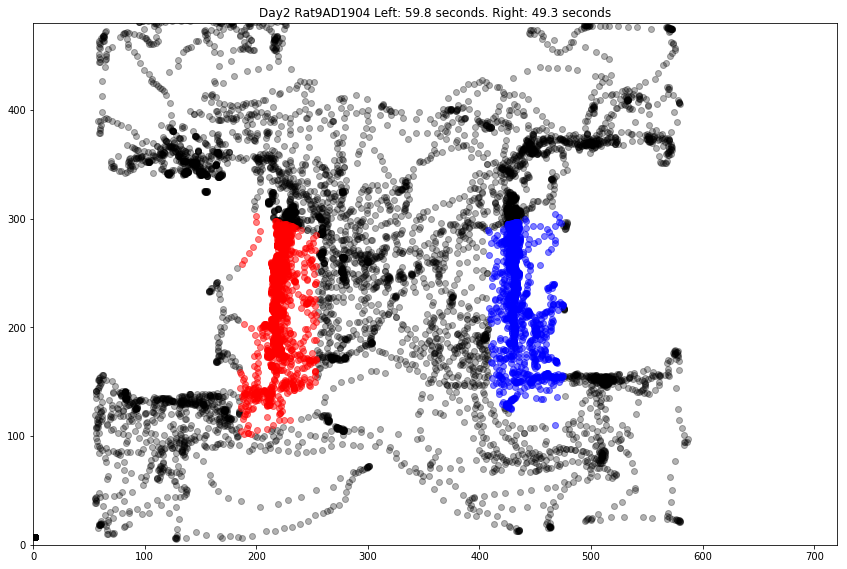

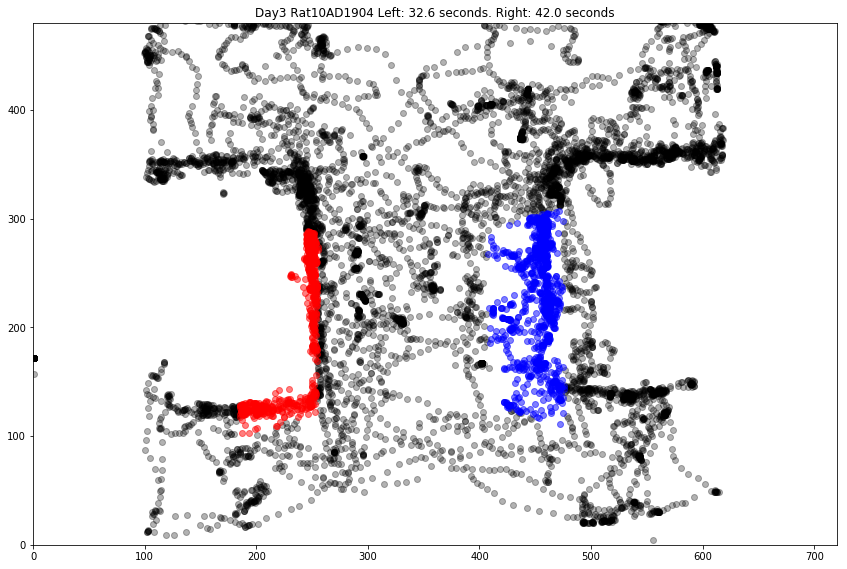

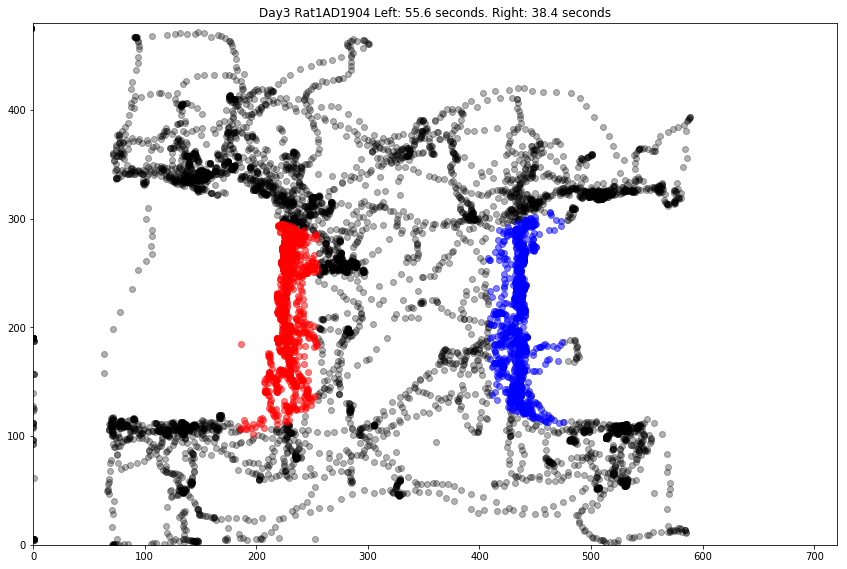

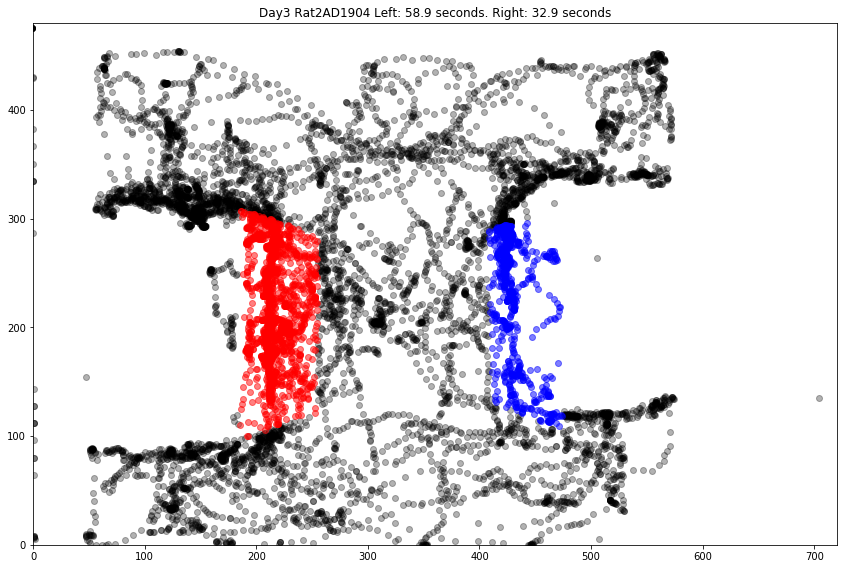

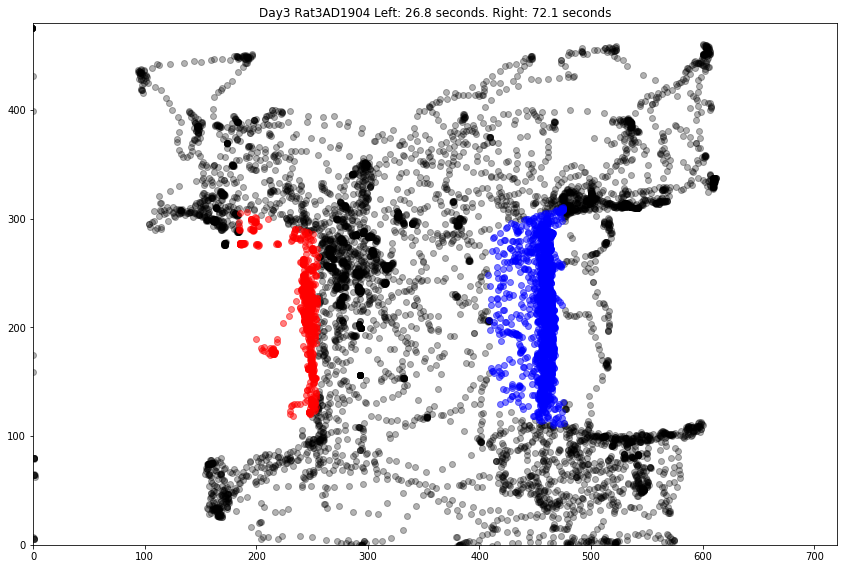

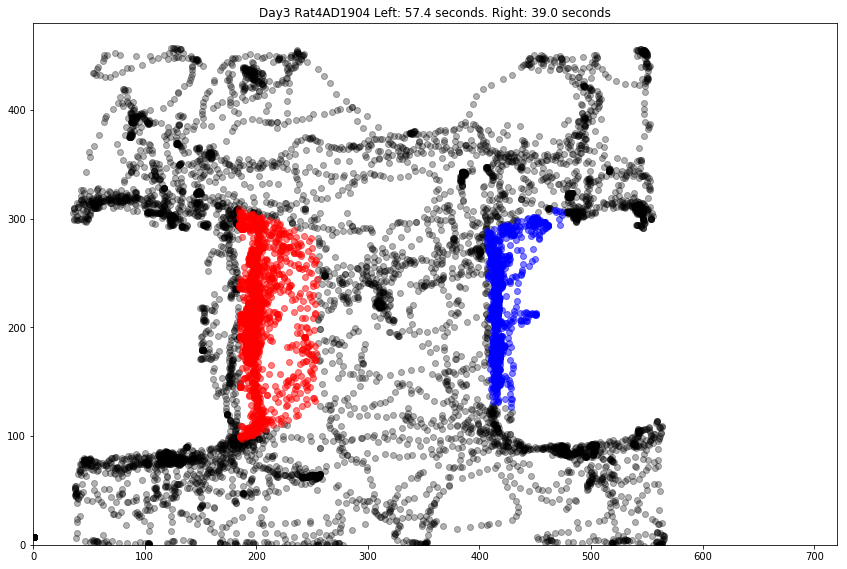

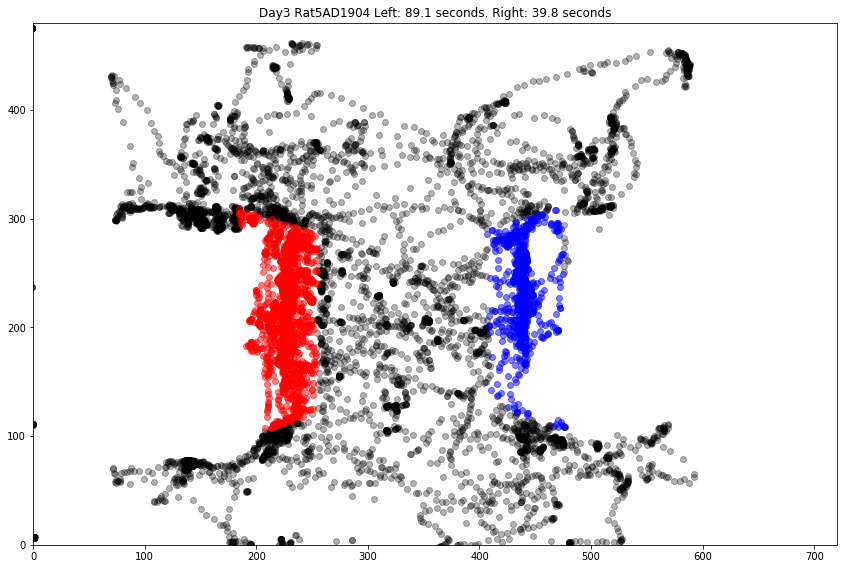

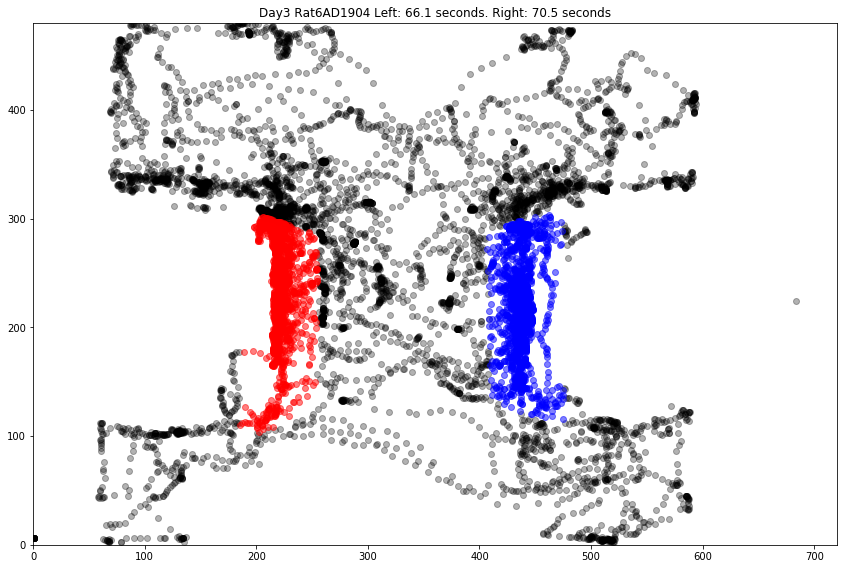

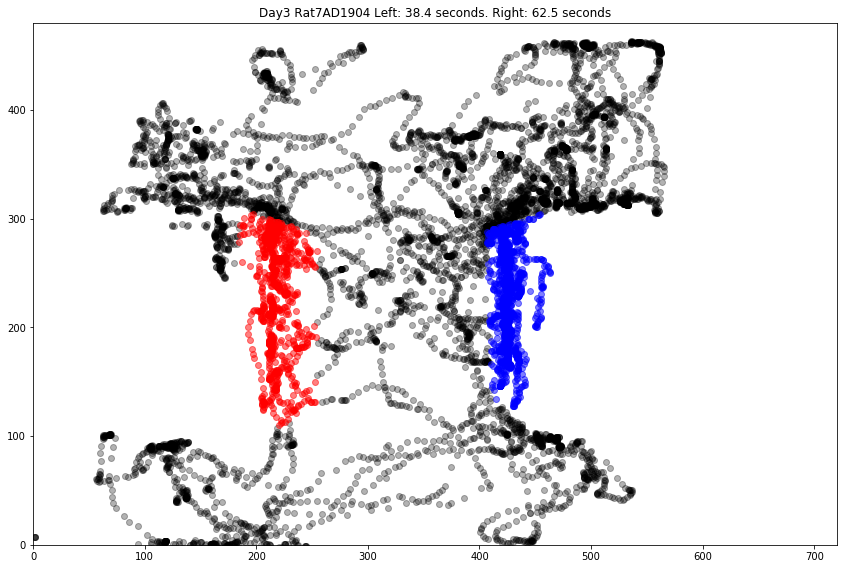

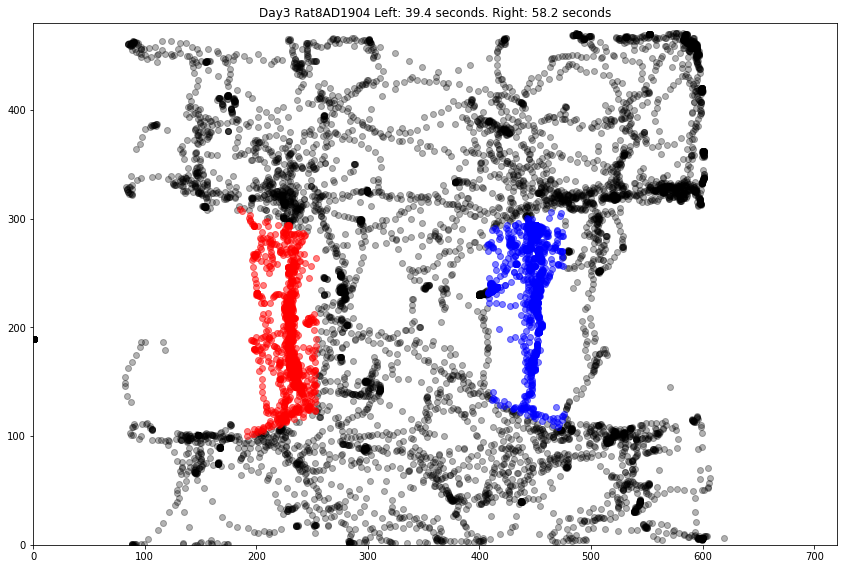

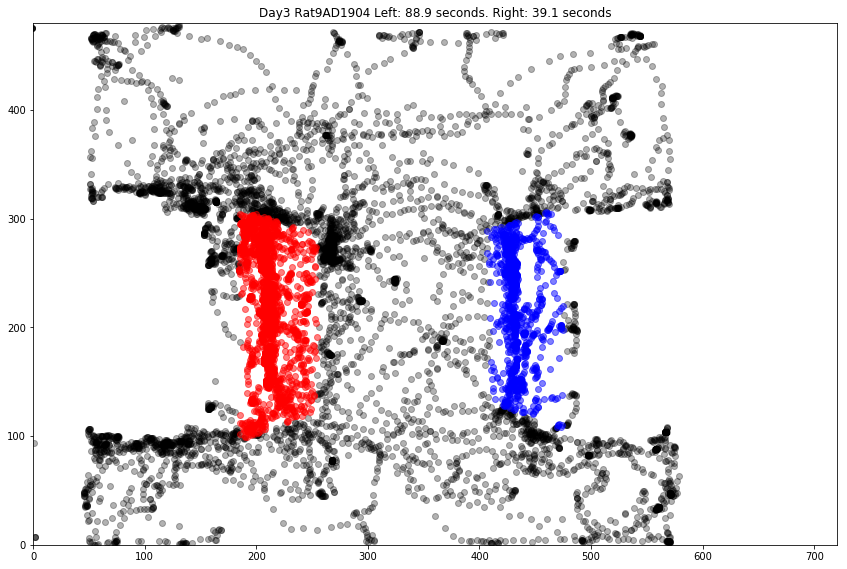

In [25]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
data = pd.read_csv('J:/DLC Files/Ad1903 Day2 Rat4DeepCut_resnet50_sapJul15shuffle1_1030000.csv')
columns = [data.iloc[0,n+1]+'_'+data.iloc[1,n+1] for n in range(15)]
data = data.iloc[2:,1:].astype(float)
data.columns = columns
data.reset_index(inplace=True)
data.drop('index', axis=1, inplace=True)


coords_df = pd.read_csv('C:/Users/nworl/Desktop/iz_coords.csv')
day_rat = [x[63:73] for x in coords_df.file]
for i, d in enumerate(day_rat):
    if d[-1] == '\\':
        day_rat[i]=d[:-1]
coords_df['day_rat']=day_rat
coords_df.drop(coords_df.columns[0], axis=1, inplace=True)

rats=[]
time_left=[]
time_right=[]

for rat in coords_df.day_rat[1:2]: #File for rat 1 in position 0 is missing. start at >0
    if rat != 'Day2 Rat1':
        if rat in rats:
            file = 'J:/DLC Files/Ad1904 '+rat+'DeepCut_resnet50_sapJul15shuffle1_1030000.csv'
        else:
            file = 'J:/DLC Files/Ad1903 '+rat+'DeepCut_resnet50_sapJul15shuffle1_1030000.csv'
        rats.append(rat)
        data = pd.read_csv(file)
        columns = [data.iloc[0,n+1]+'_'+data.iloc[1,n+1] for n in range(15)]
        data = data.iloc[2:,1:].astype(float)
        data.columns = columns
        data.reset_index(inplace=True)
        data.drop('index', axis=1, inplace=True)
        row = coords_df.loc[0,:]
        buffer = 25
        iz_left = [[row[0],row[1]],[row[2]+buffer,row[3]],[row[6]+buffer,row[7]],[row[4],row[5]]]
        iz_right = [[row[10],row[11]],[row[8]-buffer,row[9]],[row[12]-buffer,row[13]],[row[14],row[15]]]

        points = list(zip(data.nose_x, data.nose_y))

        izone_left = matplotlib.path.Path(iz_left)
        inside1 = izone_left.contains_points(points)
        data['left_iz']=inside1


        izone_right = matplotlib.path.Path(iz_right)
        inside2 = izone_right.contains_points(points)
        data['right_iz']=inside2

        outside = [True if inside1[i]==False and inside2[i]==False else False for i in range(len(inside1)) ]
        data['neutral']=outside

        ltime = inside1.sum()/30
        time_left.append(ltime)
        rtime = inside2.sum()/30
        time_right.append(rtime)

        fig, ax = plt.subplots(1,1,figsize=(14.4,9.6))
        
        ax.plot(data.nose_x[data['neutral']], data.nose_y[data['neutral']], c='k', alpha=.3, marker='o', linestyle='None')
        ax.plot(data.nose_x[data['left_iz']], data.nose_y[data['left_iz']], c='r', alpha=.5, marker='o', linestyle='None')
        ax.plot(data.nose_x[data['right_iz']], data.nose_y[data['right_iz']], c='b', alpha=.5, marker='o', linestyle='None')
        plt.xlim(0,720)
        plt.ylim(0,480)
        
        if rat in rats:
            plt.title(rat +'AD1904 Left: '+str(ltime)[:4]+' seconds. Right: '+str(rtime)[:4]+' seconds' )
            plt.savefig('C:/Users/nworl/Desktop/AD1903/AD1904'+rat+'.png')
        else:
            plt.title(rat +'AD1903 Left: '+str(ltime)[:4]+' seconds. Right: '+str(rtime)[:4]+' seconds' )
            plt.savefig('C:/Users/nworl/Desktop/AD1903/AD1903'+rat+'.png')
    
df = pd.DataFrame()
df['day_rat']=rats
df['t_left']=time_left
df['t_right']=time_right

df.to_csv('C:/Users/nworl/Desktop/AD1903/test_times.csv')